In [1]:
import pandas as pd
import datamol as dm

<Axes: >

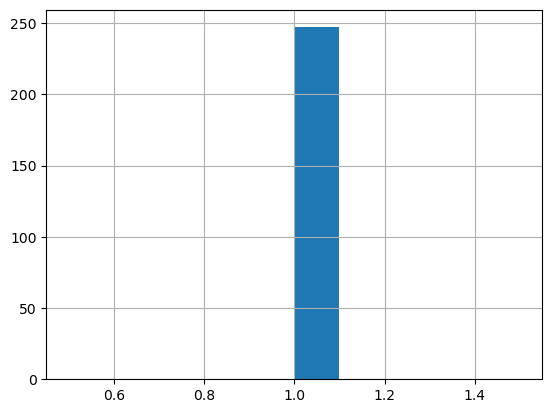

In [10]:
d = pd.read_csv("gs://pipo-data/kinases/klif-drugs.csv")
d.PDB.value_counts().hist()

In [11]:
d.PDB.notna()

0       True
1      False
2       True
3      False
4      False
       ...  
613     True
614    False
615    False
616    False
617    False
Name: PDB, Length: 618, dtype: bool

In [15]:
all_data_dir = "gs://pipo-data/kinases/chembl"
data_size = {}
for f in  dm.fs.glob(f"{all_data_dir}/*/percent_inhibition.csv"):
    name = f.split("/")[-2]
    print(name)
    data_size[name] = {}
    try:
        d = dm.read_csv(f)
        assay_id = d.assay_id.value_counts().head(1).index[0]
        d = d.query(f"assay_id == {assay_id}")
        data_size[name]["per_inhi"] = d.shape[0]
        d.to_csv(f.replace("chembl_processed", "chembl_curation_v1").replace("gcs://pipo-data/kinases", "gs://polaris/dataset/kinase"), index=False)
    except:
        pass
    break

B5MCJ9


In [17]:
d

,Unnamed: 0,class,lig_id,canonical_smiles
0,64,0,CHEMBL10,C[S+]([O-])c1ccc(-c2nc(-c3ccc(F)cc3)c(-c3ccncc...
1,1084,0,CHEMBL101804,O=C(Nc1n[nH]c2nc(-c3ccco3)ccc12)C1CC1
2,826,0,CHEMBL102936,CS(=O)(=O)Nc1ccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c...
3,1194,0,CHEMBL103080,CS(=O)(=O)Nc1cccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3...
4,483,0,CHEMBL103098,NS(=O)(=O)c1ccc(-c2ccc3c(NC(=O)C4CC4)n[nH]c3c2...
...,...,...,...,...
529,961,0,CHEMBL69757,COc1cccc(-n2ncc3c(N/N=C/c4cccc(F)c4)ncnc32)c1
530,121,0,CHEMBL7463,CN(C)CCCn1cc(C2=C(c3c[nH]c4ccccc34)C(=O)NC2=O)...
531,944,0,CHEMBL941,Cc1ccc(NC(=O)c2ccc(CN3CCN(C)CC3)cc2)cc1Nc1nccc...
532,667,0,CHEMBL95207,CN1CCC(n2cnc(-c3ccc(F)cc3)c2-c2ccnc(N)n2)CC1


In [21]:
d.assay_id

0     CHEMBL3095702
1     CHEMBL3375440
2     CHEMBL3375440
3     CHEMBL3375440
4     CHEMBL3375440
          ...      
85    CHEMBL4479778
86     CHEMBL810846
87     CHEMBL910956
88    CHEMBL1109670
89    CHEMBL4513031
Name: assay_id, Length: 90, dtype: object

In [24]:
f.replace("chembl_processed", "chembl_curation_v1").replace("gcs://pipo-data/kinases", "gs://polaris/dataset/kinases")

'gs://polaris/dataset/kinases/chembl_curation_v1/O00141/dose_response.csv'

In [5]:
all_data_dir = "gs://pipo-data/kinases/chembl_processed"
data_size = {}
for f in  dm.fs.glob(f"{all_data_dir}/*/dose_response.csv"):
    print(f)
    name = f.split("/")[-2]
    d = dm.read_csv(f)
    assay_id = d.assay_id.value_counts().head(1).index[0]
    d = d[d["assay_id"]==assay_id]
    
    if name not in data_size:
        data_size[name] = {}
    data_size[name]["dose_res"] = d.shape[0]
    if d.shape[0] > 100:
        d.to_csv(f.replace("chembl_processed", "chembl_curation_v1").replace("gcs://pipo-data/kinases", "gs://polaris-private/dataset/kinases"), index=False)

gcs://pipo-data/kinases/chembl_processed/O00141/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O00238/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O00311/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O00418/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O00444/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O00506/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14578/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14733/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14757/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14920/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14936/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14965/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O14976/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O15021/dose_response.csv
gcs://pipo-data/kinases/chembl_processed/O15075/dose_response.csv
gcs://pipo

In [ ]:
data_size[name]["dose_res"]

In [23]:
data_size

{'O00141': {'per_inhi': 765, 'dose_res': 90},
 'O00238': {'per_inhi': 34, 'dose_res': 20},
 'O00311': {'per_inhi': 6, 'dose_res': 279},
 'O00418': {'per_inhi': 236, 'dose_res': 29},
 'O00444': {'per_inhi': 86, 'dose_res': 103},
 'O00506': {'per_inhi': 80, 'dose_res': 3},
 'O14578': {'per_inhi': 39, 'dose_res': 5},
 'O14730': {'per_inhi': 32},
 'O14733': {'per_inhi': 194, 'dose_res': 167},
 'O14757': {'per_inhi': 965, 'dose_res': 1481},
 'O14920': {'per_inhi': 908, 'dose_res': 1102},
 'O14936': {'per_inhi': 26, 'dose_res': 3},
 'O14965': {'per_inhi': 1090, 'dose_res': 2070},
 'O14976': {'per_inhi': 153, 'dose_res': 74},
 'O15021': {'per_inhi': 6, 'dose_res': 3},
 'O15075': {'per_inhi': 46, 'dose_res': 34},
 'O15111': {'per_inhi': 587, 'dose_res': 147},
 'O15146': {'per_inhi': 587, 'dose_res': 9},
 'O15164': {'per_inhi': 7, 'dose_res': 44},
 'O15264': {'per_inhi': 645, 'dose_res': 54},
 'O15530': {'per_inhi': 629, 'dose_res': 607},
 'O43283': {'per_inhi': 20, 'dose_res': 3},
 'O43293': {

In [26]:
data_desc = pd.DataFrame(data_size).T

In [28]:
data_desc.describe()

,per_inhi,dose_res
count,212.000000,423.000000
mean,430.764151,328.267139
std,349.171818,763.325198
min,1.000000,1.000000
25%,60.750000,6.000000
50%,480.500000,34.000000
75%,648.250000,232.000000
max,1760.000000,6706.000000


array([[<Axes: title={'center': 'per_inhi'}>,
        <Axes: title={'center': 'dose_res'}>]], dtype=object)

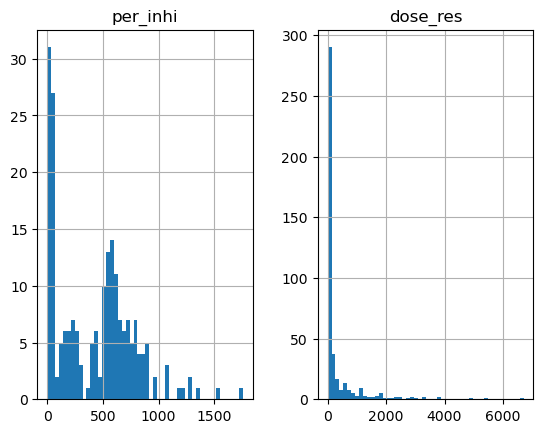

In [31]:
data_desc.hist(bins=50)

In [32]:
pd.read_csv("gs://pipo-data/kinases/kinaseatlas/O60285/summary.csv")

,Site,Maximum Consensus Site Population,Minimum Consensus Site Population,Median Consensus Site Population
